<a href="https://colab.research.google.com/github/meryreddoor/yogagame_/blob/primeraRama/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
from keras import backend as K
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display 
from PIL import Image
import h5py
import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import glob
import json

In [0]:
data = pd.read_pickle("/content/w_arraydef_domingo.pkl")

In [211]:
data.shape

(1006, 11)

In [212]:
data.head(3)

,pose,png,path,array,ardha matsyendrasana,bakasana,bitilasana,chaturanga dandasana,garudasana,other,gt
0,chaturanga dandasana,33-0.png,../img/chaturanga dandasana/33-0.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"
1,chaturanga dandasana,76-0.png,../img/chaturanga dandasana/76-0.png,"[[244, 244, 244, 244, 244, 243, 244, 244, 244,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"
2,chaturanga dandasana,50-2.png,../img/chaturanga dandasana/50-2.png,"[[254, 255, 255, 175, 122, 145, 143, 146, 144,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"


In [213]:
data['array']

0       [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1       [[244, 244, 244, 244, 244, 243, 244, 244, 244,...
2       [[254, 255, 255, 175, 122, 145, 143, 146, 144,...
3       [[246, 241, 247, 246, 247, 226, 219, 226, 224,...
4       [[196, 190, 198, 196, 198, 197, 198, 200, 196,...
                              ...                        
1001    [[221, 221, 221, 221, 221, 221, 221, 220, 220,...
1002    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1003    [[254, 254, 254, 254, 254, 254, 254, 254, 254,...
1004    [[255, 255, 254, 254, 254, 254, 254, 254, 253,...
1005    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
Name: array, Length: 1006, dtype: object

In [214]:
data.columns

Index(['pose', 'png', 'path', 'array', 'ardha matsyendrasana', 'bakasana',
       'bitilasana', 'chaturanga dandasana', 'garudasana', 'other', 'gt'],
      dtype='object')

In [0]:
X = np.stack(data['array'])
X = X / 255.0
y = np.stack(data['gt'])

In [216]:
y.shape

(1006, 6)

In [217]:
X.shape

(1006, 224, 224)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
img_rows, img_cols = 224, 224

In [0]:
# para poner el canala que falta
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [221]:
X.shape

(1006, 224, 224)

In [0]:
#DATA AUGMENTATION

'''datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = datagen.flow(X_train,y_train)

validation_generator = datagen.flow(X_test,y_test)
'''

In [222]:
n_classes = 6
batch_size = 32

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train,y_train,
               batch_size = batch_size,
               epochs = 15,
               verbose = 1,
               validation_data = (X_test,y_test))

Train on 905 samples, validate on 101 samples
Epoch 1/15
905/905 [==============================] - 76s 83ms/step - loss: 1.8181 - acc: 0.1702 - val_loss: 1.7910 - val_acc: 0.1683
Epoch 2/15
905/905 [==============================] - 74s 81ms/step - loss: 1.7817 - acc: 0.2033 - val_loss: 1.7798 - val_acc: 0.3465
Epoch 3/15
905/905 [==============================] - 74s 82ms/step - loss: 1.7284 - acc: 0.2530 - val_loss: 1.7292 - val_acc: 0.3960
Epoch 4/15
905/905 [==============================] - 74s 82ms/step - loss: 1.6166 - acc: 0.3525 - val_loss: 1.6477 - val_acc: 0.4158
Epoch 5/15
905/905 [==============================] - 74s 82ms/step - loss: 1.4764 - acc: 0.3724 - val_loss: 1.7469 - val_acc: 0.2475
Epoch 6/15
905/905 [==============================] - 74s 82ms/step - loss: 1.4224 - acc: 0.4376 - val_loss: 1.4011 - val_acc: 0.5644
Epoch 7/15
905/905 [==============================] - 74s 82ms/step - loss: 1.3304 - acc: 0.4575 - val_loss: 1.3508 - val_acc: 0.5446
Epoch 8/15
905/9

In [224]:
'''STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID)'''

'STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size\nSTEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size\n\nmodel.fit_generator(train_generator,\n                    steps_per_epoch=STEP_SIZE_TRAIN,\n                    epochs=20,\n                    validation_data=validation_generator,\n                    validation_steps=STEP_SIZE_VALID)'

In [252]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Accuracy: 83.17%
Test loss: 0.5717973301906397
Test accuracy: 0.8316831689069767


In [253]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 26, 26, 64)      

In [225]:
data.columns

Index(['pose', 'png', 'path', 'array', 'ardha matsyendrasana', 'bakasana',
       'bitilasana', 'chaturanga dandasana', 'garudasana', 'other', 'gt'],
      dtype='object')

[2 5 1 3 4 5 0 3 0 2 4 4 0 2 1 5 5 2 0 5 2 1 1 1 1 0 4 3 4 4 1 0 2 5 1 1 4
 1 0 5 2 3 4 2 0 0 4 2 4 4 5 5 3 5 3 0 4 3 3 2 4 1 3 0 0 2 2 4 2 5 5 1 2 1
 1 3 2 2 3 3 0 4 3 0 3 4 0 4 0 1 5 0 2 2 0 0 1 0 2 3 2]
[2 5 1 3 4 5 5 3 0 3 4 4 0 2 1 5 1 2 0 5 2 5 1 1 5 0 4 0 4 4 1 0 5 1 1 3 4
 1 0 5 2 3 0 2 0 0 4 2 4 4 5 1 3 5 3 0 4 3 3 3 4 2 3 0 0 2 2 1 2 0 5 1 2 1
 1 3 2 2 3 3 0 4 3 0 3 4 0 4 0 5 5 0 2 2 0 0 1 0 3 3 2]


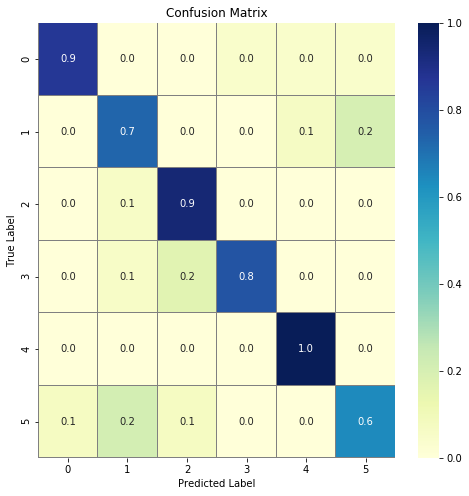

In [226]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
print(Y_pred_classes)
Y_true = np.argmax(y_test,axis = 1)
print(Y_true)
# compute the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [0]:
class_names = ('ardha matsyendrasana', 'bakasana','bitilasana', 'chaturanga dandasana', 'garudasana', 'other')

[3.4931429e-02 6.4381994e-03 7.2847604e-04 1.9843592e-03 8.7323684e-01
 8.2680695e-02]
(1, 224, 224, 1)
Probs -> ardha matsyendrasana:0.03493 bakasana:0.00644 bitilasana:0.00073 chaturanga dandasana:0.00198 garudasana:0.87324 other:0.08268


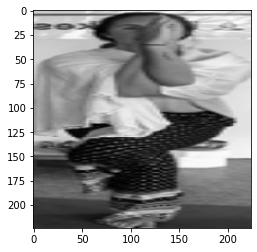

In [228]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[60]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)
print(np.expand_dims(img,axis=0).shape)
plt.imshow(Image.fromarray(img.squeeze()*255))
'','', ' ', 'other'
print("Probs -> ardha matsyendrasana:{0:.5f} bakasana:{1:.5f} bitilasana:{2:.5f} chaturanga dandasana:{3:.5f} garudasana:{4:.5f} other:{5:.5f}".format(pred[0],pred[1],pred[2],pred[3],pred[4],pred[5]))

In [0]:

def makeImagDf(path):
    dictionary = {}
    for paths in glob.glob(path):
        dictionary.setdefault('pose', []).append(paths.split('/')[-2])
        dictionary.setdefault('png', []).append(paths.split('/')[-1])
        dictionary.setdefault('path', []).append(paths)
        dictionary.setdefault('array', []).append(cv2.resize(cv2.imread(paths, cv2.IMREAD_GRAYSCALE),(224,224)))
    images = pd.DataFrame(dictionary)
    return images

In [0]:
data_ima = makeImagDf('/content/bakasana.jpg')

In [249]:
data_ima.head()

,pose,png,path,array
0,content,bakasana.jpg,/content/bakasana.jpg,"[[226, 226, 226, 226, 226, 226, 227, 226, 226,..."


In [0]:
outsider_img = np.stack(data_ima['array'])
outsider_img = outsider_img / 255

(1, 224, 224, 1)
Probs -> ardha matsyendrasana:0.03680 bakasana:0.03066 bitilasana:0.01566 chaturanga dandasana:0.08031 garudasana:0.00306 other:0.83352


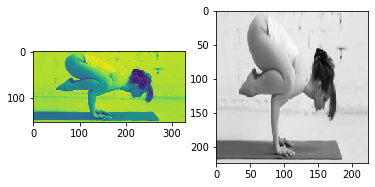

In [251]:
PIC = outsider_img # transform pic

plt.subplot(121)
plt.imshow(cv2.imread('/content/bakasana.jpg', cv2.IMREAD_GRAYSCALE)) # original pic
plt.subplot(122)
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic

PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 224, 224, 1)
print(PIC.shape)
pred = model.predict(PIC)[0]
print("Probs -> ardha matsyendrasana:{0:.5f} bakasana:{1:.5f} bitilasana:{2:.5f} chaturanga dandasana:{3:.5f} garudasana:{4:.5f} other:{5:.5f}".format(pred[0],pred[1],pred[2],pred[3],pred[4],pred[5]))

In [0]:
model.save('my_model_multiclass10.h5') #save model 

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("my_model_multiclass10.h5")

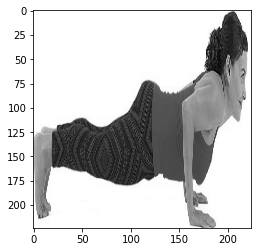

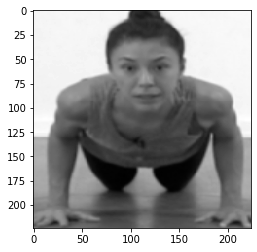

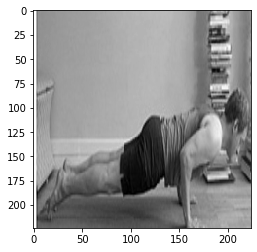

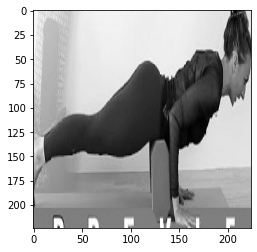

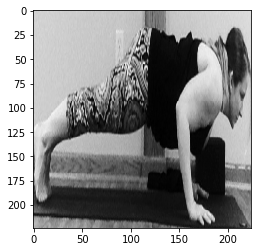

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
columns = 5
for i in range(columns):
    plt.figure()
    im = X[i]
    plt.imshow(im,cmap="gray")